In [1]:
# Иерархические методы

In [5]:
# Самая простая иерархичесая структура - это древо решений.
# Древа решений применяются для решения задач классификации и прогнозирования.
# В наиболее простом виде древо решений это ответы на вопросы да и нет.
# (Посмотри Задачу классификации цетов ириса (Fisher, 1936) ((Есть такой датасет)))
# Деревья решений рисуют линии строго препендикулярно осям
# Преимущества деревьев решений:
#   Интуитивность и интерпретированность деревьев решений
#   Деревья решений дают возможность извлекать правила из базы данных на естественном языке
#   Алгоритм конструирования дерева решений не требует от пользователя выбора входных атрибутов (Независимых переменных)
#   Точность моделей
#   Разработаны ряд масштабируемых алгоритмов
#   Быстрый процесс обучения
#   Имеют возможность специальной обработки пропущенных значений
#   Могут работать и с числовыми и с категориальными типами данных
# Недостатки деревьев решений:
#   Некоторые алгоритмы например: Исключающая или
#   Плохая предсказательная (обобщающая) способность

In [57]:
import pandas as pd #импорт библиотек, которые потребуются.
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image

%matplotlib inline # Вообще нам сказали, что это для настройки графика по факту хз

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

UsageError: unrecognized arguments: # Вообще нам сказали, что это для настройки графика по факту хз


In [58]:
df_churn = pd.read_csv('dir_for_csv_file/Модуль_2_Тема_2_Отток.csv') # загрузим данные из файла (данные по оттоку клиентов)

In [59]:
df_churn.head().transpose() #Посмотрим на наши данные, видно, что они нуждаются в обработке.

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account Length,128,107,137,84,75
Area Code,415,415,415,408,415
Phone,382-4657,371-7191,358-1921,375-9999,330-6626
Int'l Plan,no,no,no,yes,yes
VMail Plan,yes,yes,no,no,no
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Day Calls,110,123,114,71,113
Day Charge,45.07,27.47,41.38,50.9,28.34


In [60]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [97]:
def preproc(df_init: pd.DataFrame): # Объявляем функцию
    df_preproc = df_init.copy()
    df_preproc = df_preproc.drop(['State', 'Area Code', 'Phone', 'Account Length', 'Intl Charge',
                                  'Day Calls', 'Eve Calls', 'VMail Message'], axis=1) # удаляем малоинформативные столбцы

    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']] = \
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']].replace({'no': 0, 'yes': 1}) # делаем замену значений в указанных столбцах

    df_preproc.loc[:,  'Churn?'] = df_preproc.loc[:,  'Churn?'].replace({'False.': 0, # аналогично делаем замену и в столбце 'Churn?'
                                                                         'True.': 1})
    return df_preproc

In [98]:
df_preproc = df_churn.pipe(preproc) # обрабоатываем датафрейм при помощи функции, описанной выше.
df_preproc.info() # смотрим на наши данные - пропусков нет, и среди данных только числовые значения.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Int'l Plan      3333 non-null   int64  
 1   VMail Plan      3333 non-null   int64  
 2   Day Mins        3333 non-null   float64
 3   Day Charge      3333 non-null   float64
 4   Eve Mins        3333 non-null   float64
 5   Eve Charge      3333 non-null   float64
 6   Night Mins      3333 non-null   float64
 7   Night Calls     3333 non-null   int64  
 8   Night Charge    3333 non-null   float64
 9   Intl Mins       3333 non-null   float64
 10  Intl Calls      3333 non-null   int64  
 11  CustServ Calls  3333 non-null   int64  
 12  Churn?          3333 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 338.6 KB


In [99]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values # разделяем датафрейм на два множества:
# данные для обучения и ответы.

In [116]:
X.shape
X

array([[  0. ,   1. , 265.1, ...,  10. ,   3. ,   1. ],
       [  0. ,   1. , 161.6, ...,  13.7,   3. ,   1. ],
       [  0. ,   0. , 243.4, ...,  12.2,   5. ,   0. ],
       ...,
       [  0. ,   0. , 180.8, ...,  14.1,   6. ,   2. ],
       [  1. ,   0. , 213.8, ...,   5. ,  10. ,   2. ],
       [  0. ,   1. , 234.4, ...,  13.7,   4. ,   0. ]])

In [115]:
y.shape

(3333,)

In [102]:
type(X)

numpy.ndarray

# Кросс-валидация по одному гиперпараметру

In [103]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

In [104]:
from sklearn.tree import DecisionTreeClassifier #импортируем модель деревьев решений
model = DecisionTreeClassifier(random_state=123) # инициализируем модель

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132) #разбиваем наше множество на 5 частей и перемешиваем "shuffle=True"

train_scores, valid_scores = validation_curve(model, X, y,       #задаем параметры для валидационной кривой.
                                              param_name='max_depth', param_range=range(1, 20),
                                              cv=cv, scoring='roc_auc')

In [105]:
train_scores.shape

(19, 5)

In [106]:
valid_scores.shape


(19, 5)

0.8920430721348044


Text(0, 0.5, 'ROC AUC')

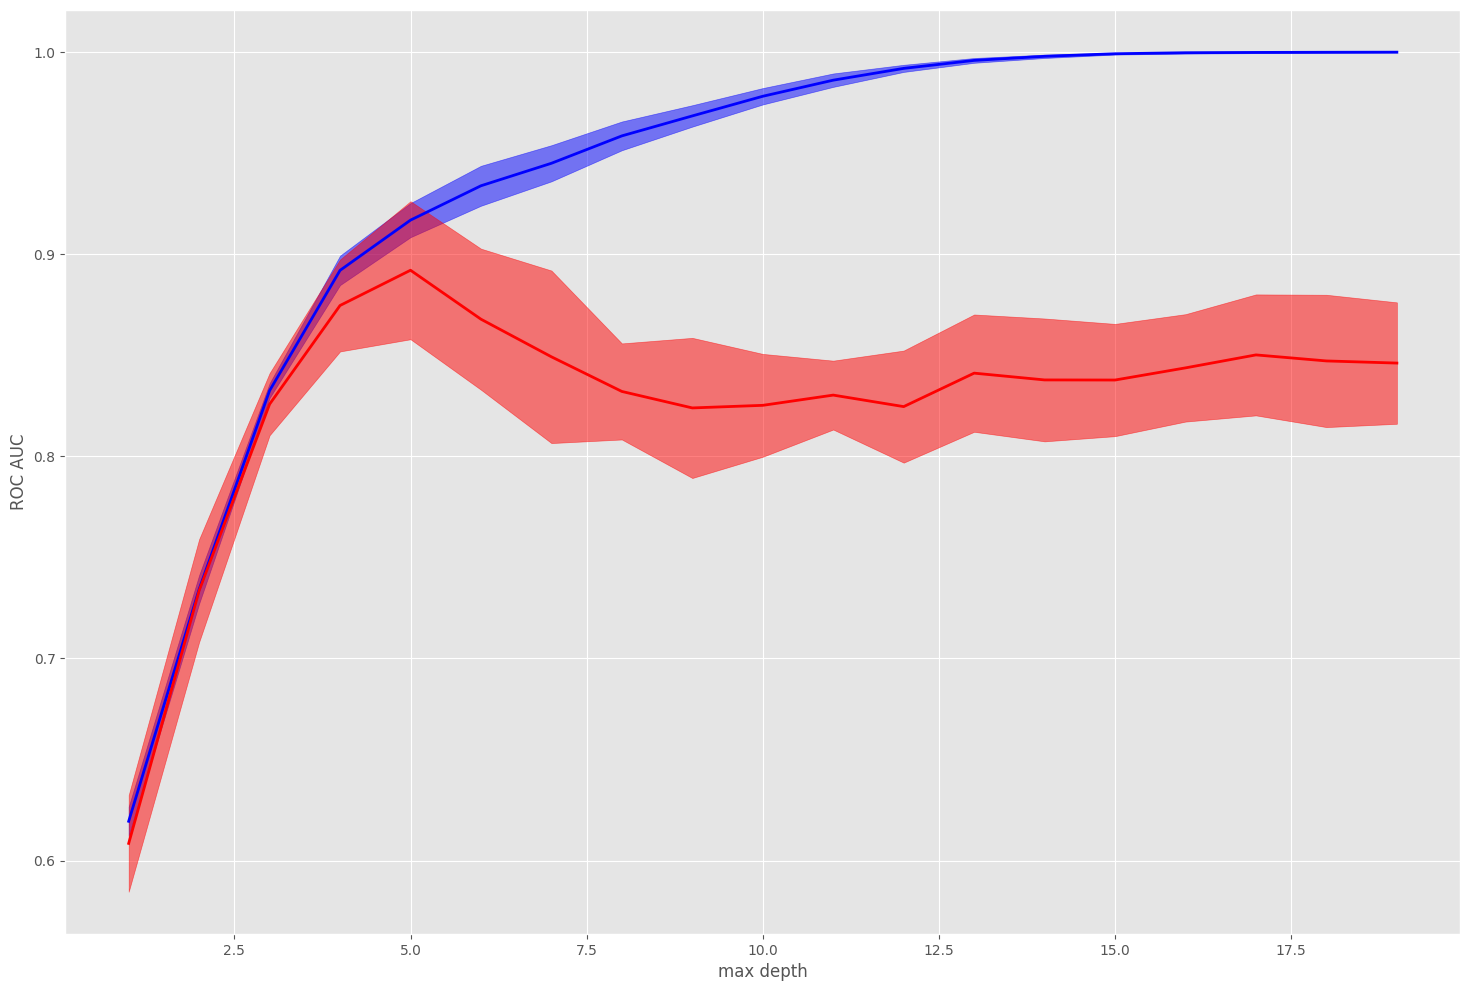

In [107]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,20), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,20), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r',
                 interpolate=True, alpha=0.5)

plt.plot(range(1,20), train_score_mean, c='b', lw=2)
plt.plot(range(1,20), valid_scores_mean, c='r', lw=2)
print(max(valid_scores_mean))

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

In [108]:

from sklearn.model_selection import RandomizedSearchCV #импортирует случайный поиск

RND_SEED = 123

In [109]:
param_grid = {                                 #зададим параметры по которым и будем осуществлять поиск
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 8),
    'min_samples_leaf': range(5, 10),
    'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)

random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 8),
                                        'min_samples_leaf': range(5, 10)},
                   random_state=123, scoring='roc_auc')

In [110]:
random_search.best_params_ #выведем наилучшие параметры

{'min_samples_leaf': 8,
 'max_depth': 5,
 'criterion': 'entropy',
 'class_weight': None}

In [111]:
random_search.best_score_ #лучшее значение метрики

0.897516277807922

In [112]:
best_model = random_search.best_estimator_;
best_model #параметры наилучшей модели

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       random_state=123)

In [113]:
model = random_search.best_estimator_
imp = model.feature_importances_

In [114]:
pd.Series(index=df_preproc.columns[:-1], data = imp).sort_values()

Night Charge      0.000000
Night Calls       0.003033
Night Mins        0.031592
VMail Plan        0.044805
Eve Charge        0.045166
Eve Mins          0.071004
Intl Calls        0.072658
Day Mins          0.097181
Intl Mins         0.105665
Int'l Plan        0.144571
CustServ Calls    0.163178
Day Charge        0.221147
dtype: float64